In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('flying-etiquette.csv')

# Display the first few rows of the dataframe
print(data.head())

   RespondentID How often do you travel by plane?  \
0    3436139758               Once a year or less   
1    3434278696               Once a year or less   
2    3434275578               Once a year or less   
3    3434268208               Once a year or less   
4    3434250245              Once a month or less   

  Do you ever recline your seat when you fly? How tall are you?  \
0                                         NaN               NaN   
1                         About half the time              6'3"   
2                                     Usually              5'8"   
3                                      Always             5'11"   
4                         About half the time              5'7"   

  Do you have any children under 18?  \
0                                NaN   
1                                Yes   
2                                 No   
3                                 No   
4                                 No   

  In a row of three seats, who should

In [3]:
# Check for missing values
print(data.isnull().sum())

# Data Cleaning
# Fill missing values or drop rows/columns with missing values
# Replacing all NaN values with the string "null"
data.fillna('null', inplace=True)

RespondentID                                                                                                                                  0
How often do you travel by plane?                                                                                                             0
Do you ever recline your seat when you fly?                                                                                                 182
How tall are you?                                                                                                                           182
Do you have any children under 18?                                                                                                          189
In a row of three seats, who should get to use the two arm rests?                                                                           184
In a row of two seats, who should get to use the middle arm rest?                                                                       

In [4]:
# Assuming 'data' is the DataFrame after filling missing values

# Save the preprocessed data to a CSV file
data.to_csv('preprocessed_flying_etiquette.csv', index=False)

# Optionally, print a message or check to confirm it was saved correctly
print("Preprocessed data saved to 'preprocessed_flying_etiquette.csv'.")


Preprocessed data saved to 'preprocessed_flying_etiquette.csv'.


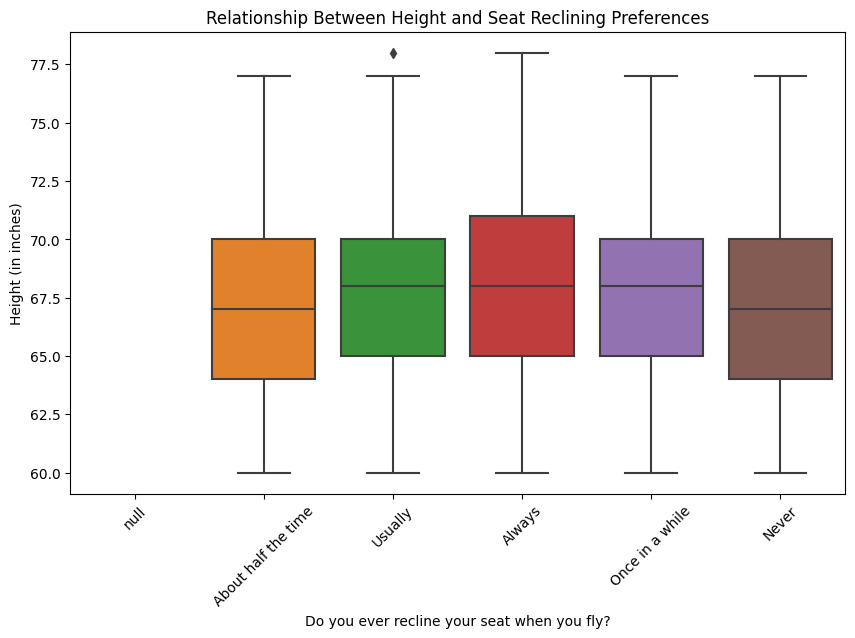

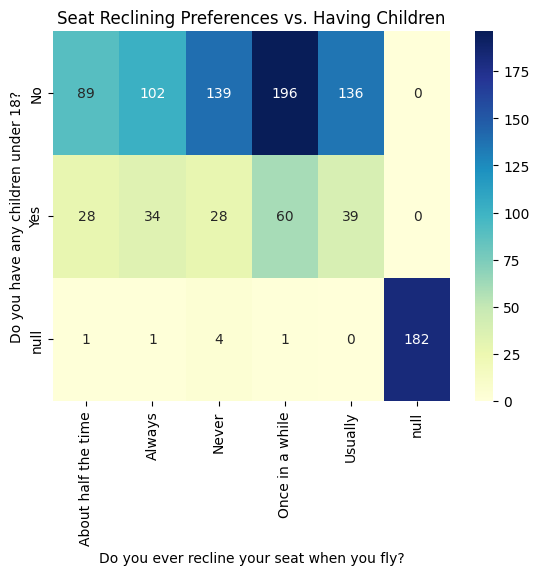

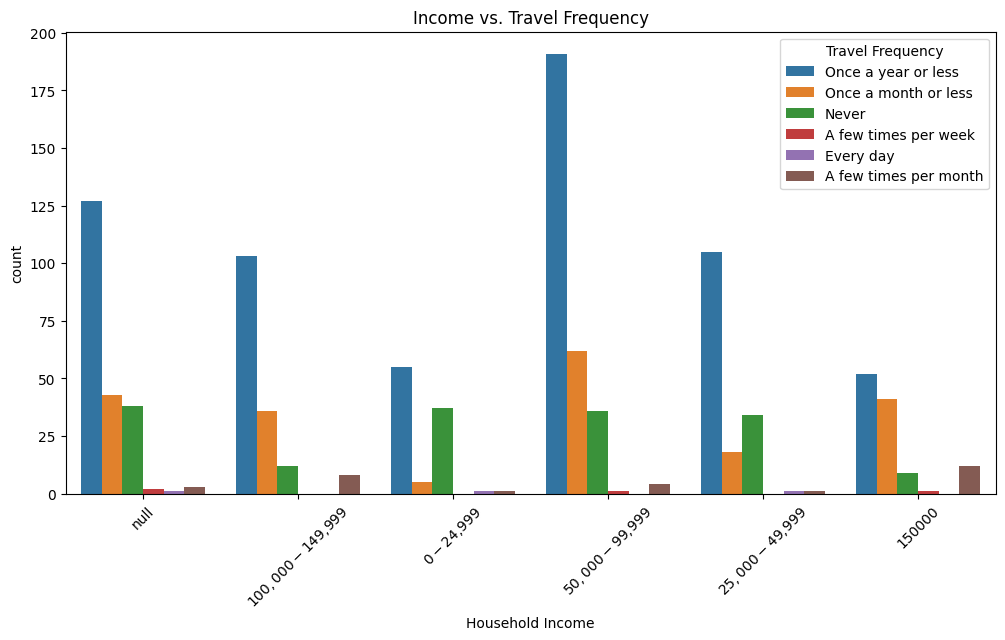

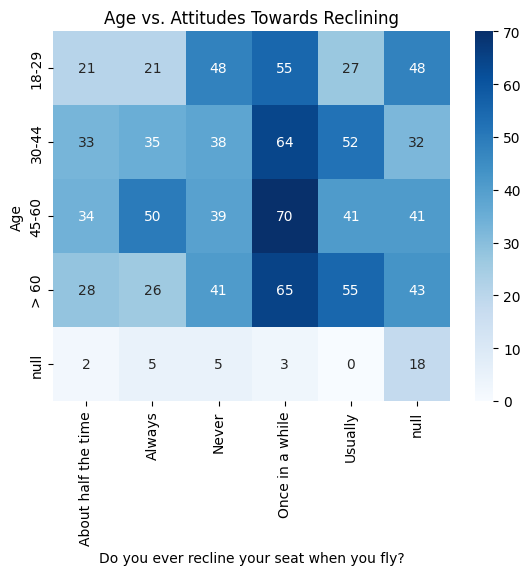

In [5]:

# Convert 'How tall are you?' from feet'inches" to total inches
data['Height_inches'] = data['How tall are you?'].str.extract('(\d+)\'').astype(float) * 12 + \
                        data['How tall are you?'].str.extract('(\d+)\"').astype(float)

# Height and Seat Reclining
# Analyze the relationship between height and seat reclining preferences
plt.figure(figsize=(10, 6))
sns.boxplot(x='Do you ever recline your seat when you fly?', y='Height_inches', data=data)
plt.title('Relationship Between Height and Seat Reclining Preferences')
plt.ylabel('Height (in inches)')
plt.xticks(rotation=45)
plt.show()

# Children and Seat Preferences
# Explore relationship between having children and seat reclining/arm rest usage
children_preferences = data.pivot_table(index='Do you have any children under 18?',
                                        columns='Do you ever recline your seat when you fly?',
                                        aggfunc='size', fill_value=0)
sns.heatmap(children_preferences, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Seat Reclining Preferences vs. Having Children')
plt.show()

# Income and Travel Frequency
# Investigate the relationship between household income and travel frequency
plt.figure(figsize=(12, 6))
sns.countplot(x='Household Income', hue='How often do you travel by plane?', data=data)
plt.title('Income vs. Travel Frequency')
plt.xticks(rotation=45)
plt.legend(title='Travel Frequency', loc='upper right')
plt.show()

# Age and Attitudes Towards Reclining
# Look at age in conjunction with opinions on seat reclining
age_reclining = pd.crosstab(data['Age'], data['Do you ever recline your seat when you fly?'])
sns.heatmap(age_reclining, annot=True, cmap="Blues", fmt='d')
plt.title('Age vs. Attitudes Towards Reclining')
plt.show()
